In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


46.98525273087232
41.14324005792356
38.22877847772184


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


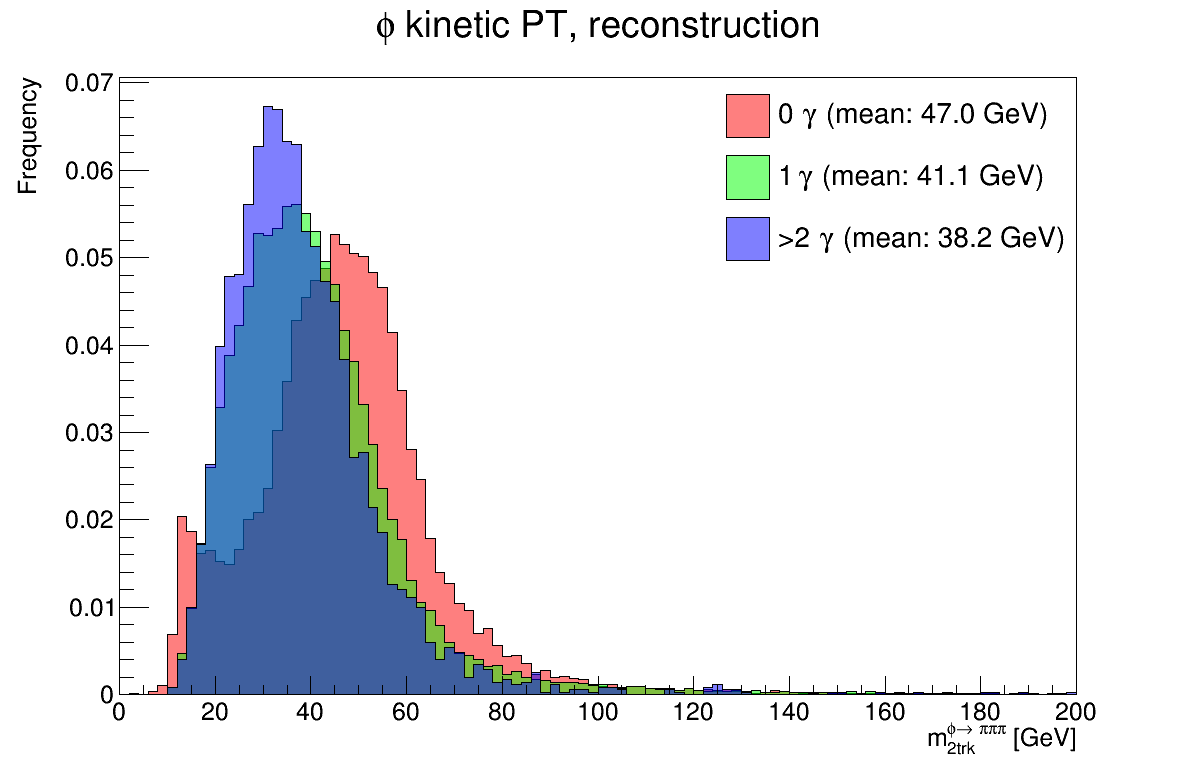

In [15]:
date = "MAY23"

chainSGN = ROOT.TChain("events")
chainSGN.Add("/home/submit/pdmonte/Hrare2023/analysis/outputs/{0}/2018/outname_mc1040_GFcat_OmegaCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

bins=100

h0=df.Define("scale", "w*lumiIntegrated")\
    .Define("filt", "(goodMeson_Nphotons < 1)")\
    .Define("good", "goodMeson_charged_pt[filt]")\
    .Histo1D(("hist", "#phi kinematic mass", bins, 0.0, 200),"good")

h1=df.Define("scale", "w*lumiIntegrated")\
    .Define("filt", "(goodMeson_Nphotons < 2 && goodMeson_Nphotons > 0)")\
    .Define("good", "goodMeson_charged_pt[filt]")\
    .Histo1D(("hist", "#phi kinematic mass", bins, 0.0, 200),"good")

h2=df.Define("scale", "w*lumiIntegrated")\
    .Define("filt", "(goodMeson_Nphotons > 1)")\
    .Define("good", "goodMeson_charged_pt[filt]")\
    .Histo1D(("hist", "#phi kinematic mass", bins, 0.0, 200),"good")

h0.SetFillColorAlpha(ROOT.kRed, 0.5)
h0.SetLineColor(ROOT.kBlack)
h1.SetFillColorAlpha(ROOT.kGreen, 0.5)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColorAlpha(ROOT.kBlue, 0.5)
h2.SetLineColor(ROOT.kBlack)

h0.Scale(1/h0.GetEntries())
h1.Scale(1/h1.GetEntries())
h2.Scale(1/h2.GetEntries())

print(h0.GetMean())
print(h1.GetMean())
print(h2.GetMean())

stack = ROOT.THStack("stack", "#phi kinetic PT, reconstruction")
stack.Add(h0.GetValue())
stack.Add(h1.GetValue())
stack.Add(h2.GetValue())
stack.Draw("hist nostack")
stack.GetXaxis().SetTitle("m_{2trk}^{#phi#rightarrow #pi#pi#pi} [GeV]")
stack.GetYaxis().SetTitle("Frequency")

legend = ROOT.TLegend(0.60, 0.65, 0.8999, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(h0.GetValue(), "0 #gamma (mean: {:.1f} GeV)".format(round(h0.GetMean(), 3)), "f")
legend.AddEntry(h1.GetValue(), "1 #gamma (mean: {:.1f} GeV)".format(round(h1.GetMean(), 3)), "f")
legend.AddEntry(h2.GetValue(), ">2 #gamma (mean: {:.1f} GeV)".format(round(h2.GetMean(), 3)), "f")
legend.Draw()

canvas.Draw()


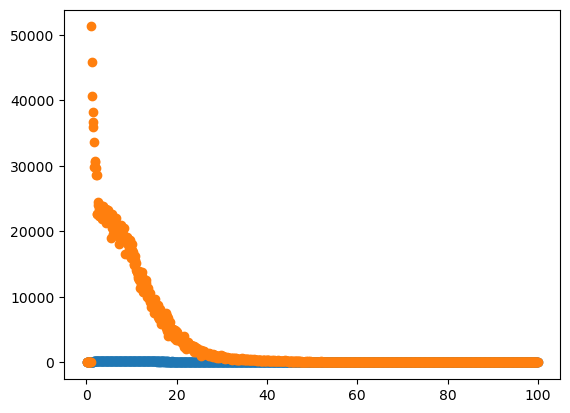

/tmp/ipykernel_1542739/3732756781.py:8: RuntimeWarning: invalid value encountered in divide
  plt.scatter(x, ys/np.sqrt(yb))


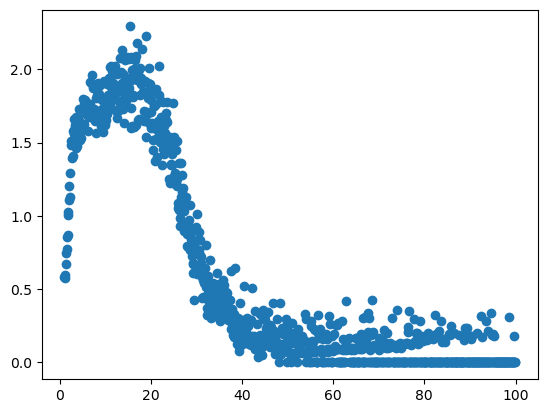

In [11]:
ys=np.asarray(ys)
yb=np.asarray(yb)

plt.scatter(x, ys)
plt.scatter(x, yb)
plt.show()

plt.scatter(x, ys/np.sqrt(yb))
plt.show()

In [16]:
cols = ["mc"]

x = df.AsNumpy(columns=cols)

print(df.AsNumpy(columns=cols)["mc"][0])

pddf = pd.DataFrame(x)

display(pddf["mc"])
print(set(pddf["mc"]))

{ "DeepMETResolutionTune_phi", "DeepMETResolutionTune_pt", "GenPart_eta", "GenPart_genPartIdxMother", "GenPart_mass", "GenPart_pdgId", "GenPart_phi", "GenPart_pt", "HCandMass", "HCandPT", "PV_npvsGood", "SoftActivityJetNjets5", "classify", "dEtaGammaMesonCand", "dPhiGammaMesonCand", "event", "goodMeson", "goodMeson_DR", "goodMeson_Nphotons", "goodMeson_charged_eta", "goodMeson_charged_mass", "goodMeson_charged_phi", "goodMeson_charged_pt", "goodMeson_iso", "goodMeson_mass", "goodMeson_massErr", "goodMeson_photons_DR", "goodMeson_photons_pt", "goodMeson_pt", "goodMeson_sipPV", "goodMeson_threemass", "goodMeson_trk1_eta", "goodMeson_trk1_pt", "goodMeson_trk2_eta", "goodMeson_trk2_pt", "goodMeson_vtx_chi2dof", "goodMeson_vtx_prob", "goodPhotons_energyErr", "goodPhotons_eta", "goodPhotons_hoe", "goodPhotons_mvaID", "goodPhotons_pfRelIso03_all", "goodPhotons_pt", "goodPhotons_r9", "goodPhotons_sieie", "index_pair", "lumiIntegrated", "luminosityBlock", "mc", "meson_pt", "nGenPart", "nGoodJet

0        1040
1        1040
2        1040
3        1040
4        1040
         ... 
65986    1040
65987    1040
65988    1040
65989    1040
65990    1040
Name: mc, Length: 65991, dtype: int32

{1040}


In [8]:

cols = ["mass_size", "lead", "leadval", "leadsum", "leadfiltered"]

x = new.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

display(pddf)

display(pddf[pddf["mass_size"] > 1])
#display(pddf[(pddf["goodMeson_vtx_prob_std"].notnull()) & (pddf["goodMeson_vtx_chi2dof_std"].notnull())])
#pddf = pddf[(pddf["goodMeson_vtx_prob_std"].notnull()) & (pddf["goodMeson_vtx_chi2dof_std"].notnull()) & (pddf["mass_size"] > 1)]
pddf = pddf[(pddf["mass_size"] > 1)]
display(pddf[pddf["leadsum"] < 2])

for c in cols:
    num = np.asarray(pddf[c])
    print(num, np.sum(num), np.count_nonzero(np.isnan(num)))
    counts, bins = np.histogram(num)
    plt.title(c)
    plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
    plt.show()
    print("min:", np.min(num), "max:", np.max(num), "avg:", np.average(num))
    for el in sorted(Counter(num).items(), key=lambda pair: pair[0]):
        print(el)

runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Define(basic_string_view<char,char_traits<char> > name, basic_string_view<char,char_traits<char> > expression) =>
    runtime_error: RDataFrame::Define: cannot define column "lead". A column with that name has already been Define'd. Use Redefine to force redefinition.
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Define(basic_string_view<char,char_traits<char> > name, basic_string_view<char,char_traits<char> > expression) =>
    runtime_error: RDataFrame::Define: cannot define column "lead". A column with that name has already been Define'd. Use Redefine to force redefinition.

In [4]:
#pddf["size"] = pddf.apply(lambda row: len(row["Pi0PhiGenPT"])*len(row["PionGenDR"]), axis=1)

#pddf["Pi0PhiGenPT"] = pddf["Pi0PhiGenPT"].apply(lambda vec: vec[0])
#pddf["PionGenDR"] = pddf["PionGenDR"].apply(lambda vec: vec[0])
#pddf = pddf[(pddf['size'] > 0)]

pt = np.asarray(pddf[(pddf['PionGenDR'] > 0.2)]["Pi0PhiGenPT"])
dr = np.asarray(pddf[(pddf['PionGenDR'] > 0.2)]["PionGenDR"])

pt = np.asarray(pddf["Pi0PhiGenPT"])
dr = np.asarray(pddf["PionGenDR"])

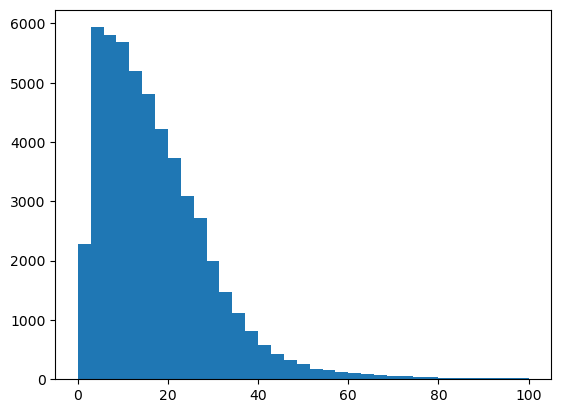

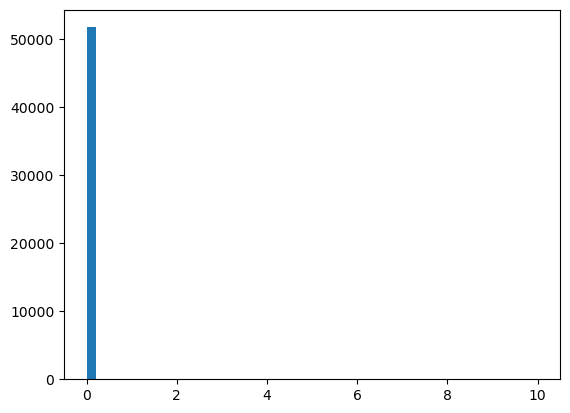

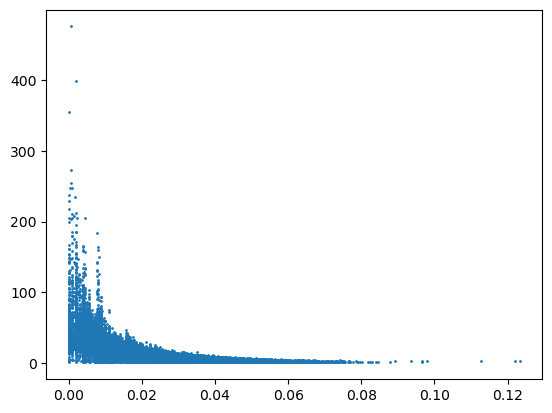

0.12334103882312775


In [6]:
counts, bins = np.histogram(pt, bins=35, range=(0,100))
plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
plt.show()

counts, bins = np.histogram(dr, bins=50, range=(0,10))
plt.bar(bins[:-1], counts, width=np.diff(bins), align="edge")
plt.show()

plt.scatter(dr, pt, s=1)
plt.show()

print(np.max(dr))